### Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load data files

In [2]:
aisles = pd.read_csv("data/aisles.csv")
departments = pd.read_csv("data/departments.csv")
orders = pd.read_csv("data/orders.csv")
products = pd.read_csv("data/products.csv")
order_products_prior = pd.read_csv("data/order_products__prior.csv")
order_products_train = pd.read_csv("data/order_products__train.csv")

### Merging data frames into one data frame

In [3]:
df = pd.concat([order_products_prior,order_products_train],axis = 0)
df = df.merge(products, how = 'inner', on = 'product_id')
df = df.merge(aisles, on = 'aisle_id')
df = df.merge(departments, on = 'department_id')
df = df.merge(orders, on = 'order_id')

### Creating a new data frame with required columns

In [4]:
all_orders = df[['user_id','order_id','product_id','product_name','aisle_id','aisle','department_id','department','add_to_cart_order']]
all_orders.head()

,user_id,order_id,product_id,product_name,aisle_id,aisle,department_id,department,add_to_cart_order
0,202279,2,33120,Organic Egg Whites,86,eggs,16,dairy eggs,1
1,202279,2,28985,Michigan Organic Kale,83,fresh vegetables,4,produce,2
2,202279,2,17794,Carrots,83,fresh vegetables,4,produce,6
3,202279,2,43668,Classic Blend Cole Slaw,123,packaged vegetables fruits,4,produce,9
4,202279,2,9327,Garlic Powder,104,spices seasonings,13,pantry,3


In [5]:
all_orders['product_name'].value_counts()

Banana                                                          491291
Bag of Organic Bananas                                          394930
Organic Strawberries                                            275577
Organic Baby Spinach                                            251705
Organic Hass Avocado                                            220877
                                                                 ...  
Cajun Sides Dirty Rice                                               1
Vitality Chicken Breasts with Flaxseed & Vitamins Dog Treats         1
7.04 Oz. Grahamfuls Banana Vanilla 8ct                               1
Bottle & Nipple Brush Set                                            1
Indian Wells Merlot                                                  1
Name: product_name, Length: 49685, dtype: int64

Grouping user_id with aisle, user_id with department and retrieving only required columns into new dataframe 

In [6]:
aisle = all_orders.groupby(['user_id','aisle']).sum().reset_index()
aisle

,user_id,aisle,order_id,product_id,aisle_id,department_id,add_to_cart_order
0,1,candy chocolate,3738261,79314,90,38,8
1,1,cereal,6687191,52128,484,56,26
2,1,cream,6591748,147705,159,48,17
3,1,fresh fruits,4124931,95587,120,20,30
4,1,milk,1187899,27845,84,16,9
...,...,...,...,...,...,...,...
5919835,206209,soft drinks,19152139,75306,847,77,26
5919836,206209,soy lactosefree,17442005,94050,910,160,20
5919837,206209,spices seasonings,2266710,31130,104,13,9
5919838,206209,trash bags liners,2129269,17500,60,17,6


In [7]:
aisle = all_orders.groupby(['user_id','aisle']).sum().reset_index()
aisle = aisle[['user_id','aisle','add_to_cart_order']]
dept = all_orders.groupby(['user_id','department']).sum().reset_index()
dept = dept[['user_id','department','add_to_cart_order']]

In [8]:
aisle.head()

,user_id,aisle,add_to_cart_order
0,1,candy chocolate,8
1,1,cereal,26
2,1,cream,17
3,1,fresh fruits,30
4,1,milk,9


In [9]:
dept.head()

,user_id,department,add_to_cart_order
0,1,beverages,35
1,1,breakfast,26
2,1,dairy eggs,76
3,1,household,14
4,1,pantry,5


Grouping user_id with add_to_cart_order for each user in order to find out user volume

In [10]:
user_volume = aisle.groupby('user_id')['add_to_cart_order'].sum().reset_index().rename(columns = {'add_to_cart_order':'volume'})

In [11]:
user_volume.head()

,user_id,volume
0,1,280
1,2,2164
2,3,391
3,4,50
4,5,249


Merging user_volume dataframe with both aisle,department dataframes

In [12]:
aisle = aisle.merge(user_volume, how = 'inner', on = 'user_id')
dept = dept.merge(user_volume, how = 'inner', on = 'user_id')

In [13]:
aisle.head()

,user_id,aisle,add_to_cart_order,volume
0,1,candy chocolate,8,280
1,1,cereal,26,280
2,1,cream,17,280
3,1,fresh fruits,30,280
4,1,milk,9,280


In [14]:
dept.head()

,user_id,department,add_to_cart_order,volume
0,1,beverages,35,280
1,1,breakfast,26,280
2,1,dairy eggs,76,280
3,1,household,14,280
4,1,pantry,5,280


Finding out share for each aisle and department

In [15]:
aisle['aisle_share'] = aisle['add_to_cart_order']/aisle['volume']
dept['dept_share'] = dept['add_to_cart_order']/dept['volume']

In [16]:
aisle.head()

,user_id,aisle,add_to_cart_order,volume,aisle_share
0,1,candy chocolate,8,280,0.028571
1,1,cereal,26,280,0.092857
2,1,cream,17,280,0.060714
3,1,fresh fruits,30,280,0.107143
4,1,milk,9,280,0.032143


Reshaping data based on aisle and department values values.

In [17]:
aisle

,user_id,aisle,add_to_cart_order,volume,aisle_share
0,1,candy chocolate,8,280,0.028571
1,1,cereal,26,280,0.092857
2,1,cream,17,280,0.060714
3,1,fresh fruits,30,280,0.107143
4,1,milk,9,280,0.032143
...,...,...,...,...,...
5919835,206209,soft drinks,26,912,0.028509
5919836,206209,soy lactosefree,20,912,0.021930
5919837,206209,spices seasonings,9,912,0.009868
5919838,206209,trash bags liners,6,912,0.006579


In [18]:
aisle_vol_pivot = aisle[['user_id','aisle','add_to_cart_order']].pivot(index = 'user_id', columns = 'aisle', values = 'add_to_cart_order')
aisle_share_pivot = aisle[['user_id','aisle','aisle_share']].pivot(index = 'user_id', columns = 'aisle', values = 'aisle_share')

In [19]:
aisle_vol_pivot.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2,NaN,23.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,...,50.0,7.0,15.0,NaN,NaN,NaN,NaN,18.0,NaN,403.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,5.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN
5,5.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0


In [20]:
dept_vol_pivot = dept[['user_id','department','add_to_cart_order']].pivot(index = 'user_id', columns = 'department', values = 'add_to_cart_order')
dept_share_pivot = dept[['user_id','department','dept_share']].pivot(index = 'user_id', columns = 'department', values = 'dept_share')

In [21]:
dept_vol_pivot.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,35.0,26.0,NaN,NaN,76.0,NaN,NaN,...,14.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,30.0,94.0
2,NaN,NaN,28.0,75.0,21.0,NaN,88.0,453.0,199.0,NaN,...,NaN,23.0,12.0,NaN,NaN,88.0,24.0,NaN,346.0,311.0
3,NaN,NaN,NaN,16.0,NaN,NaN,NaN,62.0,11.0,15.0,...,5.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,177.0,57.0
4,2.0,NaN,4.0,6.0,NaN,NaN,1.0,NaN,5.0,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1.0
5,NaN,NaN,NaN,NaN,NaN,NaN,8.0,49.0,1.0,2.0,...,5.0,19.0,NaN,NaN,NaN,8.0,NaN,NaN,142.0,8.0


Filling null values with 0

In [22]:
aisle_vol_pivot = aisle_vol_pivot.fillna(value = 0)
aisle_share_pivot = aisle_share_pivot.fillna(value = 0)
dept_vol_pivot = dept_vol_pivot.fillna(value = 0)
dept_share_pivot = dept_share_pivot.fillna(value = 0)

I then used PCA to reduce the number of features for the K-Means algorithm. This would allow me to better visualize my clusters and make K-Means run more efficiently. I chose a cutoff after the marginal variance added leveled off to determine the number of components to use

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
pca = PCA(n_components = 30)
principal_components = pca.fit_transform(aisle_share_pivot)
pca_components = pd.DataFrame(principal_components)

In [25]:
pca_components.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.103161,0.048618,-0.031837,-0.005635,-0.053037,-0.055211,0.077178,-0.059406,-0.044047,0.024245,...,-0.058301,0.100274,0.017772,-0.025782,0.077451,0.028121,0.017886,-0.022651,0.035958,-0.019302
1,-0.077766,0.077983,-0.076149,-0.101673,0.081773,-0.040418,-0.011311,0.060090,0.094835,0.093877,...,0.002787,0.014355,-0.013879,-0.004004,0.002898,0.013323,-0.006627,-0.017363,-0.012303,-0.001641
2,0.057496,0.085719,0.001778,-0.013186,-0.028487,0.113091,0.009699,0.005207,0.015915,-0.019249,...,-0.046018,-0.011687,-0.018113,-0.004570,0.000460,0.000076,-0.009899,-0.008033,-0.018617,-0.006893
3,-0.055343,0.134730,-0.002394,-0.037711,-0.087820,-0.027399,-0.023333,0.024910,0.143007,0.174336,...,0.003668,-0.004314,-0.021310,0.007783,0.008027,-0.004314,0.010370,-0.019422,-0.009679,-0.008787
4,0.133936,-0.019591,-0.020959,-0.003732,0.057736,0.138877,0.046956,-0.012700,0.000001,-0.034760,...,-0.022979,0.013483,0.003253,-0.002679,-0.009303,0.000869,-0.001093,0.012298,-0.009747,-0.002986


explained_variance_ratio_ndarray of shape (n_components,)  
Percentage of variance explained by each of the selected components.  

If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.



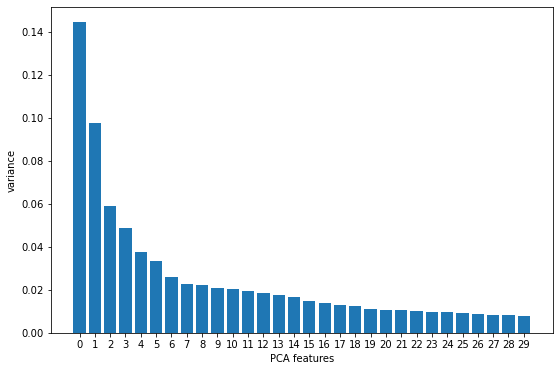

In [26]:
features = range(pca.n_components_)
plt.figure(figsize=(9,6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

<Figure size 864x648 with 0 Axes>

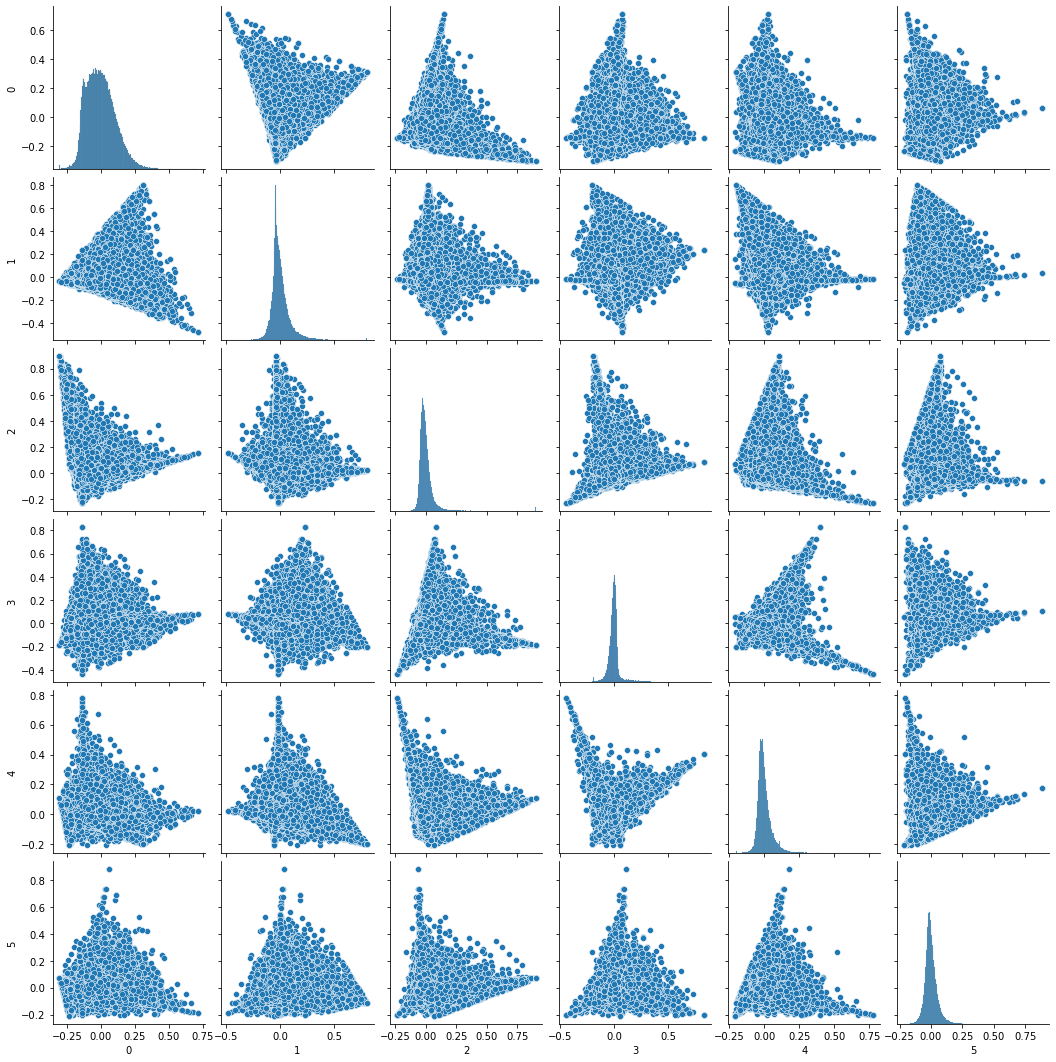

In [27]:
plt.figure(figsize=(12,9))
sns.pairplot(pca_components[[0,1,2,3,4,5]])
plt.show()

### Performing K Means clustering

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

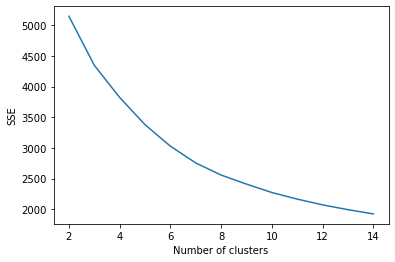

In [29]:
sse = {}
labels = {}
for k in range(2,15):
    kmeans = KMeans(n_clusters = k).fit(pca_components[[0,1,2,3,4,5]])
    sse[k] = kmeans.inertia_
    labels[k] = kmeans.labels_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Because it appears that the curve begins to flatten at cluster 5, I proceeded with cluster 6. The following clusters are plotted on a scatterplot matrix of the six PCA components:

In [30]:
cluster_df = pd.concat([pca_components[[0,1,2,3,4,5]],pd.Series(labels[6]).rename('cluster')], axis = 1)

<Figure size 864x648 with 0 Axes>

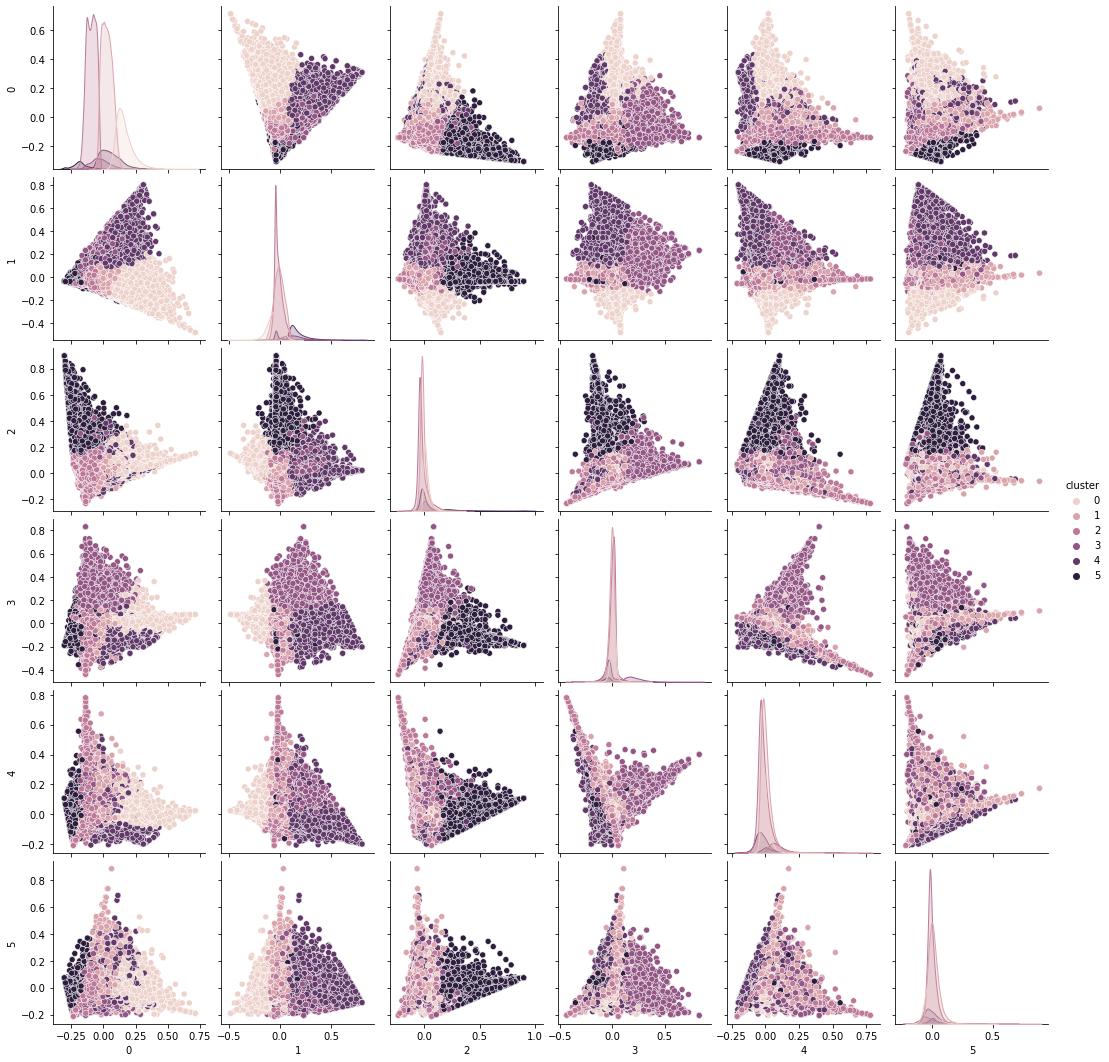

In [31]:
plt.figure(figsize=(12,9))
sns.pairplot(cluster_df, hue = 'cluster')
plt.show()

In [32]:
cluster_df = pd.concat([pd.Series(aisle_share_pivot.index),cluster_df],axis = 1)
cluster_df

,user_id,0,1,2,3,4,5,cluster
0,1,-0.103161,0.048618,-0.031837,-0.005635,-0.053037,-0.055211,2
1,2,-0.077766,0.077983,-0.076149,-0.101673,0.081773,-0.040418,2
2,3,0.057496,0.085719,0.001778,-0.013186,-0.028487,0.113091,1
3,4,-0.055343,0.134730,-0.002394,-0.037711,-0.087820,-0.027399,4
4,5,0.133936,-0.019591,-0.020959,-0.003732,0.057736,0.138877,1
...,...,...,...,...,...,...,...,...
206204,206205,-0.021674,0.081783,-0.073480,-0.088440,0.155955,-0.022731,1
206205,206206,-0.040316,-0.036658,-0.024048,0.010058,-0.051014,0.000804,2
206206,206207,-0.022110,-0.032613,-0.009469,-0.015803,0.021490,0.020450,1
206207,206208,-0.002217,-0.010633,-0.037621,-0.007752,0.028738,0.044836,1


Merging cluster(user_id,cluster) dataframe with aisle, department dataframes based on user_id

In [33]:
aisle = aisle.merge(cluster_df[['user_id','cluster']], on = 'user_id').rename(columns = {'aisle_share':'user_aisle_share'})
dept = dept.merge(cluster_df[['user_id','cluster']], on = 'user_id').rename(columns = {'dept_share':'user_dept_share'})

In [34]:
aisle

,user_id,aisle,add_to_cart_order,volume,user_aisle_share,cluster
0,1,candy chocolate,8,280,0.028571,2
1,1,cereal,26,280,0.092857,2
2,1,cream,17,280,0.060714,2
3,1,fresh fruits,30,280,0.107143,2
4,1,milk,9,280,0.032143,2
...,...,...,...,...,...,...
5919835,206209,soft drinks,26,912,0.028509,2
5919836,206209,soy lactosefree,20,912,0.021930,2
5919837,206209,spices seasonings,9,912,0.009868,2
5919838,206209,trash bags liners,6,912,0.006579,2


In [35]:
cluster_aisle_br = pd.DataFrame(columns = ['aisle','add_to_cart_order','aisle_share','cluster'])
for i in range(0,6):
    x = aisle[aisle['cluster'] == i]
    x = x.groupby('aisle')['add_to_cart_order'].sum().reset_index()
    x['aisle_share'] = x['add_to_cart_order']
    x['aisle_share'] = x['aisle_share'].apply(lambda f: f / x['add_to_cart_order'].sum())
    x['cluster'] = i
    cluster_aisle_br = pd.concat([x,cluster_aisle_br], axis = 0)

In [36]:
cluster_aisle_br

,aisle,add_to_cart_order,aisle_share,cluster
0,air fresheners candles,1006,0.000985,5
1,asian foods,3156,0.003089,5
2,baby accessories,108,0.000106,5
3,baby bath body care,72,0.000070,5
4,baby food formula,1180,0.001155,5
...,...,...,...,...
129,trash bags liners,20823,0.000460,0
130,vitamins supplements,54158,0.001196,0
131,water seltzer sparkling water,564213,0.012456,0
132,white wines,4618,0.000102,0


In [37]:
t20 = list(aisle.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:20].index)
t30 = list(aisle.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:30].index)

<AxesSubplot:xlabel='cluster', ylabel='aisle'>

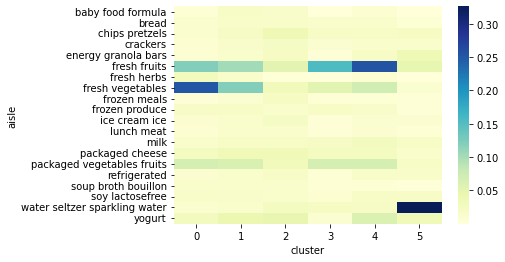

In [38]:
aisle_heat = cluster_aisle_br[cluster_aisle_br['aisle'].isin(t20)]
aisle_heat = aisle_heat.pivot(index = 'aisle', columns = 'cluster', values = 'aisle_share')
sns.heatmap(aisle_heat,cmap="YlGnBu")

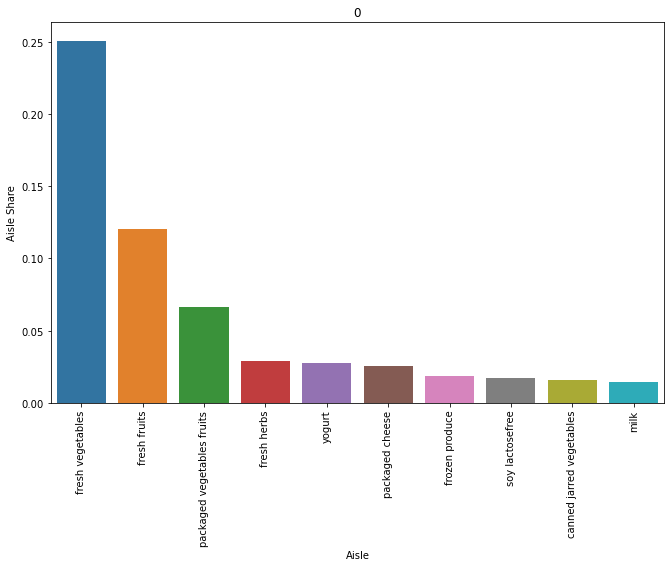

<Figure size 432x288 with 0 Axes>

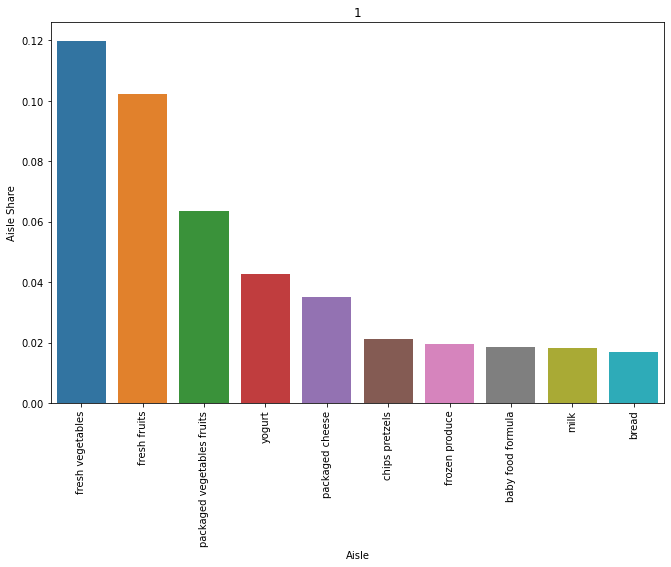

<Figure size 432x288 with 0 Axes>

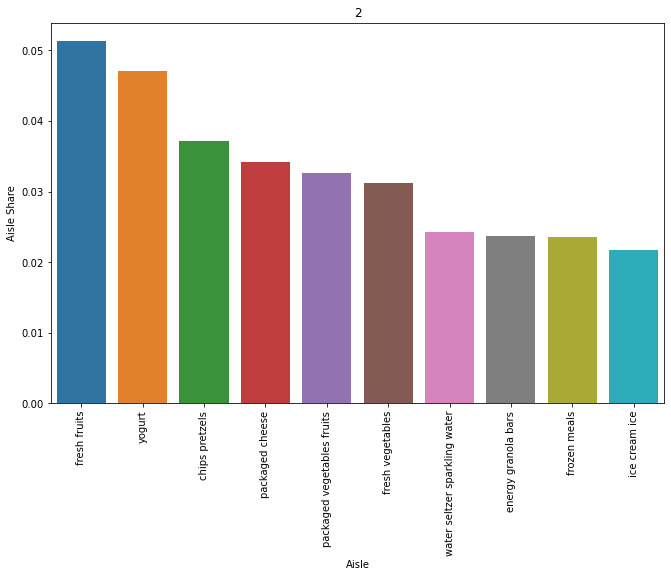

<Figure size 432x288 with 0 Axes>

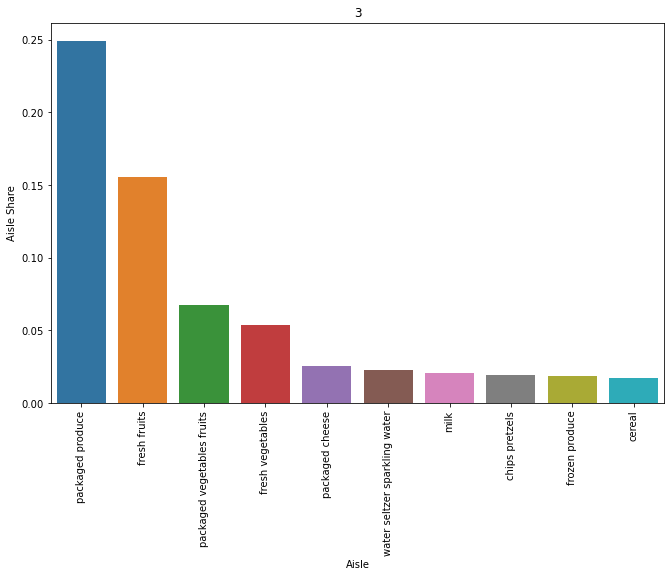

<Figure size 432x288 with 0 Axes>

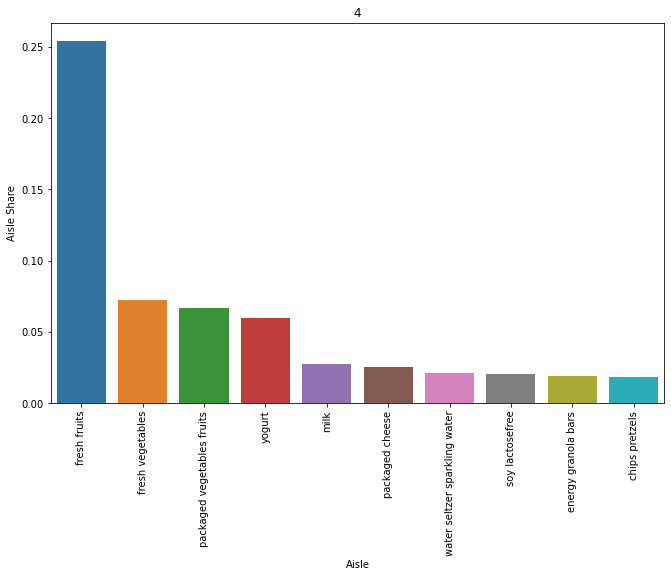

<Figure size 432x288 with 0 Axes>

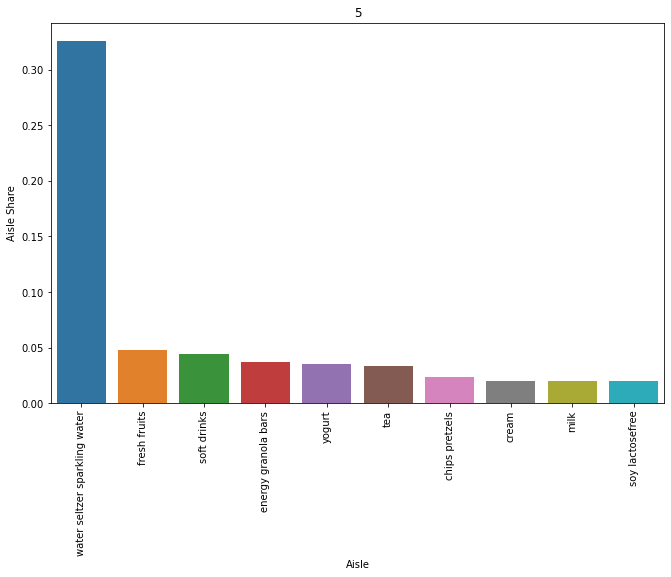

<Figure size 432x288 with 0 Axes>

In [39]:
for i in range(0,6):
    plt.figure(figsize=(11,7))
    x = sns.barplot(data = cluster_aisle_br[cluster_aisle_br['cluster'] == i].sort_values('aisle_share', ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
    x.set_xticklabels(x.get_xticklabels(), rotation=90)
    plt.title(str(i))
    x.set(xlabel = 'Aisle', ylabel = 'Aisle Share')
    plt.figure()

In [40]:
cluster_dept_br = pd.DataFrame(columns = ['department','add_to_cart_order','dept_share','cluster'])
for i in range(0,6):
    x = dept[dept['cluster'] == i]
    x = x.groupby('department')['add_to_cart_order'].sum().reset_index()
    x['dept_share'] = x['add_to_cart_order']
    x['dept_share'] = x['dept_share'].apply(lambda f: f / x['add_to_cart_order'].sum())
    x['cluster'] = i
    cluster_dept_br = pd.concat([x,cluster_dept_br], axis = 0)

In [41]:
cluster_dept_br[cluster_dept_br['cluster'] == 5].dept_share.sum()

1.0

<AxesSubplot:xlabel='cluster', ylabel='department'>

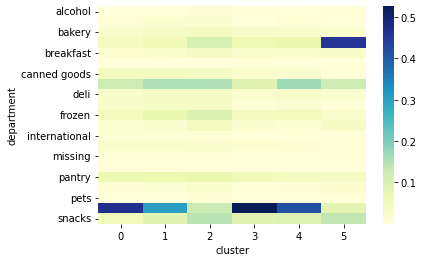

In [42]:
dept_heat = cluster_dept_br.pivot(index = 'department', columns = 'cluster', values = 'dept_share')
sns.heatmap(dept_heat,cmap="YlGnBu")

In [43]:
pd.DataFrame(cluster_df['cluster'].value_counts().reset_index())

,index,cluster
0,2,73550
1,1,72614
2,0,32841
3,4,15446
4,3,7950
5,5,3808


In [44]:
cluster_df['cluster'].value_counts().sort_index() / cluster_df['cluster'].value_counts().sum() * 100

0    15.926075
1    35.213788
2    35.667696
3     3.855312
4     7.490459
5     1.846670
Name: cluster, dtype: float64

In [45]:
cluster_aisle_br.groupby('cluster')['add_to_cart_order'].sum() / cluster_aisle_br['add_to_cart_order'].sum() * 100

cluster
0    16.006872
1    49.452865
2    29.700848
3     0.784999
4     3.693357
5     0.361059
Name: add_to_cart_order, dtype: object

In [46]:
x = pd.concat([cluster_df['cluster'].value_counts().sort_index() / cluster_df['cluster'].value_counts().sum() * 100,cluster_aisle_br.groupby('cluster')['add_to_cart_order'].sum() / cluster_aisle_br['add_to_cart_order'].sum() * 100], axis = 1)
x.rename(columns = {'cluster':'User Share','add_to_cart_order':'Unit Purchase Share'})

,User Share,Unit Purchase Share
0,15.926075,16.006872
1,35.213788,49.452865
2,35.667696,29.700848
3,3.855312,0.784999
4,7.490459,3.693357
5,1.846670,0.361059


In [47]:
cluster_df.head()

,user_id,0,1,2,3,4,5,cluster
0,1,-0.103161,0.048618,-0.031837,-0.005635,-0.053037,-0.055211,2
1,2,-0.077766,0.077983,-0.076149,-0.101673,0.081773,-0.040418,2
2,3,0.057496,0.085719,0.001778,-0.013186,-0.028487,0.113091,1
3,4,-0.055343,0.134730,-0.002394,-0.037711,-0.087820,-0.027399,4
4,5,0.133936,-0.019591,-0.020959,-0.003732,0.057736,0.138877,1


In [48]:
cluster_aisle_br

,aisle,add_to_cart_order,aisle_share,cluster
0,air fresheners candles,1006,0.000985,5
1,asian foods,3156,0.003089,5
2,baby accessories,108,0.000106,5
3,baby bath body care,72,0.000070,5
4,baby food formula,1180,0.001155,5
...,...,...,...,...
129,trash bags liners,20823,0.000460,0
130,vitamins supplements,54158,0.001196,0
131,water seltzer sparkling water,564213,0.012456,0
132,white wines,4618,0.000102,0


In [49]:
all_orders = all_orders.merge(cluster_df[['user_id','cluster']], on = 'user_id')

In [50]:
all_orders=all_orders.rename(columns={'cluster_x':'cluster'})
#all_orders=all_orders.drop('cluster_y',axis=1)

In [51]:
all_orders

,user_id,order_id,product_id,product_name,aisle_id,aisle,department_id,department,add_to_cart_order,cluster
0,202279,2,33120,Organic Egg Whites,86,eggs,16,dairy eggs,1,1
1,202279,2,28985,Michigan Organic Kale,83,fresh vegetables,4,produce,2,1
2,202279,2,17794,Carrots,83,fresh vegetables,4,produce,6,1
3,202279,2,43668,Classic Blend Cole Slaw,123,packaged vegetables fruits,4,produce,9,1
4,202279,2,9327,Garlic Powder,104,spices seasonings,13,pantry,3,1
...,...,...,...,...,...,...,...,...,...,...
33819101,95228,2942910,36885,Rose,134,specialty wines champagnes,5,alcohol,1,2
33819102,95228,77392,47713,Sparkling Rose,134,specialty wines champagnes,5,alcohol,1,2
33819103,95228,679020,47713,Sparkling Rose,134,specialty wines champagnes,5,alcohol,1,2
33819104,95228,1264096,47713,Sparkling Rose,134,specialty wines champagnes,5,alcohol,1,2


In [52]:
cluster_df.to_csv('data/cluster_df.csv')

In [53]:
all_orders.to_csv('data/all_orders.csv')

### Association Rule Mining

In [54]:
orders = all_orders.sort_values(['order_id','product_id'])
orders

,user_id,order_id,product_id,product_name,aisle_id,aisle,department_id,department,add_to_cart_order,cluster
30264547,112108,1,10246,Organic Celery Hearts,83,fresh vegetables,4,produce,3,1
30264545,112108,1,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,other creams cheeses,16,dairy eggs,2,1
30264548,112108,1,13176,Bag of Organic Bananas,24,fresh fruits,4,produce,6,1
30264544,112108,1,22035,Organic Whole String Cheese,21,packaged cheese,16,dairy eggs,8,1
30264550,112108,1,43633,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods,5,1
...,...,...,...,...,...,...,...,...,...,...
23108244,25247,3421083,21162,Organic Mixed Berry Yogurt & Fruit Snack,92,baby food formula,18,babies,3,1
23108238,25247,3421083,24852,Banana,24,fresh fruits,4,produce,9,1
23108247,25247,3421083,35211,Organic Strawberry & Mango Dried Tiny Fruits,92,baby food formula,18,babies,5,1
23108242,25247,3421083,39678,Free & Clear Natural Dishwasher Detergent,74,dish detergents,17,household,6,1


In [55]:
from itertools import combinations, groupby
from collections import Counter
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def  merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))

In [56]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) 


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) 


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders)

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [57]:
# separate order data by cluster and transform into expected format of group association function

cluster_orders = {}
for x in range(0,6):
    i = orders[orders['cluster'] == x]
    i = i.set_index('order_id')['product_id'].rename('item_id')
    cluster_orders[x] = i

In [ ]:
# run each cluster series through association rule function and obtain association rules at item level

group_association_rules_dic = {}
for x in range(0,6):
    group_association_rules_dic[x] = association_rules(cluster_orders[x],.0001)

Starting order_item:                5640976
Items with support >= 0.0001:            7484
Remaining order_item:               5361521
Remaining orders with 2+ items:      511806
Remaining order_item:               5342841


In [ ]:
group_association_rules_dic[5]

In [ ]:
# format item association rule dataframes and merge product names

for x in group_association_rules_dic:
    group_association_rules_dic[x] = group_association_rules_dic[x].merge(products[['product_id','product_name']]
               .rename(columns = {'product_id':'item_A','product_name':'product_name_A'}), on = 'item_A')
    
    group_association_rules_dic[x] = group_association_rules_dic[x].merge(products[['product_id','product_name']]
               .rename(columns = {'product_id':'item_B','product_name':'product_name_B'}), on = 'item_B')
    
    group_association_rules_dic[x] = group_association_rules_dic[x][['item_A','item_B','product_name_A',
                                                                    'product_name_B','freqAB','supportAB','freqA',
                                                                    'supportA','freqB','supportB','confidenceAtoB',
                                                                    'confidenceBtoA','lift']]

In [ ]:
# example of association rule dataframe

x = group_association_rules_dic[5]
x.sort_values('lift', ascending = False)

In [ ]:
# separate order data by cluster and transform into expected format of group association function at aisle level

cluster_aisle_orders = {}
for x in range(0,6):
    i = orders[orders['cluster'] == x]
    i = i.groupby(['order_id','aisle_id'])['product_id'].count().reset_index().set_index('order_id')['aisle_id'].rename('item_id')
    cluster_aisle_orders[x] = i

In [ ]:
orders.groupby(['order_id','aisle_id'])['product_id'].count().reset_index().set_index('order_id')['aisle_id'].rename('item_id')

In [ ]:
orders[orders['cluster'] == 5]['order_id'].nunique()

In [ ]:
# run association function at aisle level

group_aisle_association_rules_dic = {}
for x in range(0,6):
    group_aisle_association_rules_dic[x] = association_rules(cluster_aisle_orders[x],.0001)

In [ ]:
# reformat cluster aisle assocation dataframes

for x in group_aisle_association_rules_dic:
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x].merge(aisles[['aisle_id','aisle']]
               .rename(columns = {'aisle_id':'item_A','aisle':'aisle_name_A'}), on = 'item_A')
    
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x].merge(aisles[['aisle_id','aisle']]
               .rename(columns = {'aisle_id':'item_B','aisle':'aisle_name_B'}), on = 'item_B')
    
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x][['item_A','item_B','aisle_name_A',
                                                                    'aisle_name_B','freqAB','supportAB','freqA',
                                                                    'supportA','freqB','supportB','confidenceAtoB',
                                                                    'confidenceBtoA','lift']]
    
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x].rename(columns = {'item_A':'aisle_A','item_B':'aisle_B'})

In [ ]:
x = group_aisle_association_rules_dic[5].sort_values('lift',ascending = False)
x.sort_values('lift',ascending = False)

In [ ]:
cluster_df['cluster'].value_counts() / cluster_df['cluster'].value_counts().sum()

In [ ]:
for x in group_association_rules_dic:
    group_association_rules_dic[x].to_csv('data/group'+str(x)+'_item_rules.csv')

In [ ]:
for x in group_aisle_association_rules_dic:
    group_aisle_association_rules_dic[x].to_csv('data/group'+str(x)+'_aisle_rules.csv')